In [1]:
from deepcage.compute import (
    plot_3d_trajectories
)
from deepcage.auxiliary.detect import detect_triangulation_result
from deeplabcut.pose_estimation_3d.plotting3D import plot2D

from deepcage.project.get import get_labels, get_paired_labels, get_dlc3d_configs
from deepcage.project.edit import read_config
from deepcage.auxiliary.detect import detect_2d_coords
from deepcage.auxiliary.constants import CAMERAS, PAIR_IDXS, pair_cycler

from deepcage.compute.triangulate import triangulate_basis_labels, triangulate_raw_2d_camera_coords
from deepcage.compute.basis import compute_basis_vectors, create_stereo_cam_origmap, map_experiment
from deepcage.compute.utils import rad_to_deg, unit_vector

import os
import matplotlib.pylab as plt
import numpy as np
%matplotlib notebook

C:\Users\Can\Miniconda3\envs\dlc\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Can\Miniconda3\envs\dlc\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Can\Miniconda3\envs\dlc\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Can\Miniconda3\envs\dlc\lib\site-packages\tensorflow\python\framework\dty

In [14]:
root = os.path.realpath('H:/Can_cage/DeepCage_DLC_files')
config_path = os.path.join(root, 'DeepCageKeyTest-Can-2019-11-15/config.yaml')

# plot_3d_trajectories(config_path, cm_is_real_idx=True, remap=False, cols=2)
# dfs = detect_triangulation_result(config_path, change_basis=False)
dfs = map_experiment(
        config_path, suffix='_DLC_3D.h5', bonvideos=False, save=False,
        new_orig_map=True, paralell=False, use_cross=False
    )
level1 = dfs['level_1']
pair_1 = ('EastNorth', 'EastSouth')
pair_2 = ('SouthEast', 'SouthWest')

_DLC_3D.h5
Triangulations files detected, and verified
Proceeding to changing basis
DONE: Basis changed


In [15]:
tip_level1 = {pair: df for pair, df in level1['tip'].groupby(level=0, axis=1)}
turn_level1 = {pair: df for pair, df in level1['turn'].groupby(level=0, axis=1)}

In [16]:
tip_1 = tip_level1[pair_1].values
turn_1 = turn_level1[pair_1].values
tip_2 = tip_level1[pair_2].values
turn_2 = turn_level1[pair_2].values

In [23]:
dlc3d_cfgs = get_dlc3d_configs(config_path)
basis_labels = get_labels(config_path)

cfg = read_config(config_path)
test_dir = os.path.join(cfg['data_path'], 'test')

In [24]:
pair_1 = ('EastNorth', 'EastSouth')
cam_labels_1 = get_paired_labels(config_path, pair_1)['normal']
trian_dict_1, _ = triangulate_basis_labels(
    dlc3d_cfgs[pair_1], cam_labels_1, pair_1, decrement=False, keys=True
)

Calculating the basis vectors of EastNorth EastSouth
Attempting to fix coordinate-array by np.expand_dims(<array>, axis=1)


In [25]:
pair_2 = ('SouthEast', 'SouthWest')
cam_labels_2 = get_paired_labels(config_path, pair_2)['normal']
trian_dict_2, _ = triangulate_basis_labels(
    dlc3d_cfgs[pair_2], cam_labels_2, pair_2, decrement=False, keys=True
)

Calculating the basis vectors of SouthEast SouthWest
Attempting to fix coordinate-array by np.expand_dims(<array>, axis=1)


In [26]:
# fig_1 = plt.figure()
# ax_1 = fig_1.add_subplot(111, projection='3d')

# ax_1.plot(*tip_1.T, 'b')
# ax_1.plot(*turn_1.T, 'm')

# ax_1.scatter(*trian_dict_1['origin'], color='g')
# ax_1.scatter(*trian_dict_1['z-axis'], color='r')
# ax_1.scatter(*trian_dict_1[('x-axis', 'positive')], color='c')
# ax_1.scatter(*trian_dict_1[('y-axis', 'negative')], color='b')
# ax_1.scatter(*trian_dict_1[('y-axis', 'positive')], color='m')

# min_ = np.nanmin(tip_1)
# max_ = np.nanmax(tip_1)

# ax_1.set_xlim(min_, max_)
# ax_1.set_ylim(min_, max_)
# ax_1.set_zlim(min_, max_)

In [27]:
# fig_2 = plt.figure()
# ax_2 = fig_2.add_subplot(111, projection='3d')

# ax_2.plot(*tip_2.T, 'y')
# ax_2.plot(*turn_2.T, 'r')

# ax_2.scatter(*trian_dict_2['origin'], color='0.05')
# ax_2.scatter(*trian_dict_2['z-axis'], color='0.1')
# ax_2.scatter(*trian_dict_2[('y-axis', 'negative')], color='0.15')
# ax_2.scatter(*trian_dict_2[('x-axis', 'positive')], color='0.15')
# ax_2.scatter(*trian_dict_2[('x-axis', 'negative')], color='0.2')



<IPython.core.display.Javascript object>


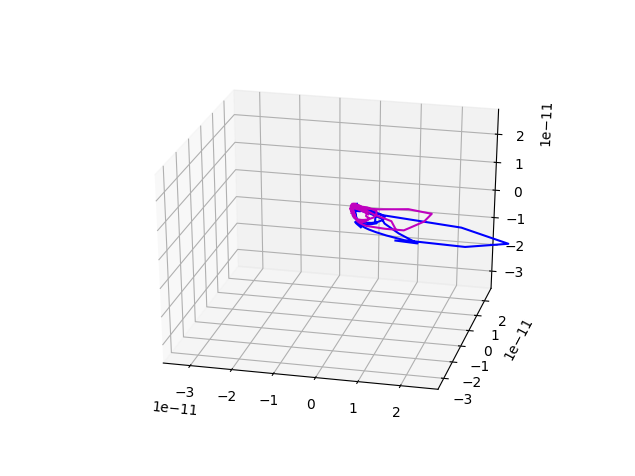

(-5.406775165775773e-11, 4.629410389200234e-11)

In [28]:
fig_all = plt.figure()
ax_all = fig_all.add_subplot(111, projection='3d')

ax_all.plot(*tip_1.T, 'b')
ax_all.plot(*turn_1.T, 'm')
# ax_all.plot(*tip_2.T, 'y')
# ax_all.plot(*turn_2.T, 'r')

min_ = np.nanmin(tip_1)
max_ = np.nanmax(tip_1)

ax_all.set_xlim(min_, max_)
ax_all.set_ylim(min_, max_)
ax_all.set_zlim(min_, max_)

In [31]:
import pandas as pd

In [32]:
pd.DataFrame(tip_1).loc[np.logical_not(np.all(np.isnan(tip_1), axis=1))]

,0,1,2
46,1.053468e-12,-1.488225e-14,5.801759e-12
47,-1.688144e-13,1.265623e-12,4.747275e-12
48,-4.165367e-13,1.345050e-12,4.381110e-12
49,-4.914877e-13,1.247268e-12,3.978376e-12
50,-2.126829e-13,7.533367e-13,4.040845e-12
...,...,...,...
201,1.619835e-13,4.426257e-13,2.837403e-12
202,1.516961e-13,4.140880e-13,2.536366e-12
203,-1.567659e-13,9.043321e-13,1.712349e-12
204,-1.967889e-13,1.031146e-12,1.412602e-12


In [33]:
a = detect_2d_coords(config_path)

H:\Can_cage\DeepCage_DLC_files\DeepCageKeyTest-Can-2019-11-15\analysis_results\triangulated\level1_onesided
['H:\\Can_cage\\DeepCage_DLC_files\\DeepCageKeyTest-Can-2019-11-15\\analysis_results\\triangulated\\level1_onesided\\0_NorthWest_NorthEast\\0_0_NorthWest_0DLC_resnet50_DeepCageKeyTestNov15shuffle1_800000filtered.h5', 'H:\\Can_cage\\DeepCage_DLC_files\\DeepCageKeyTest-Can-2019-11-15\\analysis_results\\triangulated\\level1_onesided\\0_NorthWest_NorthEast\\0_1_NorthEast_0DLC_resnet50_DeepCageKeyTestNov15shuffle1_800000filtered.h5', 'H:\\Can_cage\\DeepCage_DLC_files\\DeepCageKeyTest-Can-2019-11-15\\analysis_results\\triangulated\\level1_onesided\\1_NorthEast_EastNorth\\1_0_NorthEast_0DLC_resnet50_DeepCageKeyTestNov15shuffle1_800000filtered.h5', 'H:\\Can_cage\\DeepCage_DLC_files\\DeepCageKeyTest-Can-2019-11-15\\analysis_results\\triangulated\\level1_onesided\\1_NorthEast_EastNorth\\1_1_EastNorth_0DLC_resnet50_DeepCageKeyTestNov15shuffle1_800000filtered.h5', 'H:\\Can_cage\\DeepCage_DLC

In [34]:
trian_dict_2, _ = triangulate_basis_labels(
    dlc3d_cfgs[pair_2], cam_labels_2, pair_2, decrement=False, keys=True
)

Calculating the basis vectors of SouthEast SouthWest
Attempting to fix coordinate-array by np.expand_dims(<array>, axis=1)


In [35]:
origin_2 = trian_dict_2[('x-axis', 'negative')] + (trian_dict_2[('x-axis', 'positive')] - trian_dict_2[('x-axis', 'negative')]) / 2

In [39]:
x = trian_dict_2[('x-axis', 'positive')] - origin_2
z = trian_dict_2['z-axis'] - origin_2

In [40]:
x_n = unit_vector(x)
z_n = unit_vector(z)
y_n = np.cross(z_n, x_n)

In [42]:
from numpy.linalg import norm

In [43]:
axis_len = np.mean((norm(x), norm(z)))

In [44]:
dfs = detect_triangulation_result(config_path, change_basis=False)
tip = dfs['level_1'][pair_2]['tip']

_DLC_3D.h5
Triangulations files detected, and verified
The current DeepCage project is ready for changing basis


In [46]:
tip_o = tip - origin_2

In [47]:
tip_x = [np.dot(t, x_n) for t in tip_o]

In [48]:
tip_y = [np.dot(t, y_n) for t in tip_o]
tip_z = [np.dot(t, z_n) for t in tip_o]

In [49]:
SCALE = 4.7
tip_xs = (tip_x / axis_len) * SCALE
tip_ys = (tip_y / axis_len) * SCALE
tip_zs = (tip_z / axis_len) * SCALE

In [50]:
tip_s = np.array([tip_xs, tip_ys, tip_zs]).T

In [51]:
o_map = np.array([x_n, y_n, z_n]).T

In [52]:
ee_origin = trian_dict_1[('y-axis', 'negative')] + (trian_dict_1[('y-axis', 'positive')] - trian_dict_1[('y-axis', 'negative')]) / 2

In [53]:
ee_y = trian_dict_1[('y-axis', 'positive')] - ee_origin
ee_z = trian_dict_1['z-axis'] - ee_origin

In [54]:
print(ee_origin, ee_y, ee_z)

[-5.03633508e-13  2.07279286e-12  6.07882563e-12] [-2.59781942e-12 -1.42043558e-15 -1.64020460e-12] [ 5.65236482e-13 -4.78129876e-12 -2.37601748e-13]


In [55]:
y_n = unit_vector(ee_y)
z_n = unit_vector(ee_z)
x_n = np.cross(y_n, z_n)

In [56]:
ee_map = np.array([x_n, y_n, z_n]).T

In [57]:
ee_tip = dfs['level_1'][pair_1]['tip']

In [58]:
axis_len = np.mean((norm(ee_y), norm(ee_z)))

In [59]:
import pickle

data_path = os.path.realpath(cfg['data_path'])
basis_result_path = os.path.join(data_path, 'cb_result.pickle')
try:
    with open(basis_result_path, 'rb') as infile:
        stereo_cam_units, orig_maps = pickle.load(infile)
except FileNotFoundError:
    msg = f'Could not detect results from deepcage.compute.generate_linear_map() in:\n{basis_result_path}'
    raise FileNotFoundError(msg)

In [60]:
orig_maps[pair_1]['map']

array([[ 5.30904333e-01, -8.45565727e-01,  1.17257965e-01],
       [ 1.04553063e-01, -4.62338388e-04, -9.91877529e-01],
       [-8.40957339e-01, -5.33871133e-01, -4.92903385e-02]])

In [61]:
ee_tip_maped = SCALE * ((tip_1 - ee_origin) @ orig_maps[pair_1]['map']) / axis_len
ss_tip_maped = SCALE * ((tip_2 - origin_2) @ orig_maps[pair_2]['map']) / axis_len

<IPython.core.display.Javascript object>


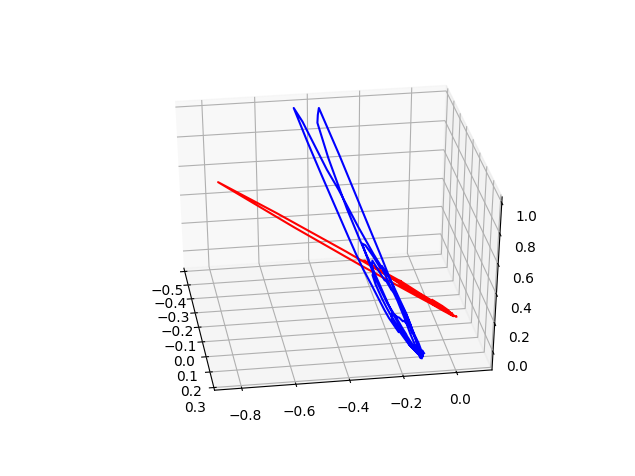

In [62]:
ee_x, ee_y, ee_z = o_map.T

fig_axis = plt.figure()
ax_axis = fig_axis.add_subplot(111, projection='3d')

ax_axis.plot(*(ee_tip_maped / np.nanmax(ee_tip_maped)).T, 'r')
ax_axis.plot(*(ss_tip_maped / np.nanmax(ss_tip_maped)).T, 'b')

<IPython.core.display.Javascript object>


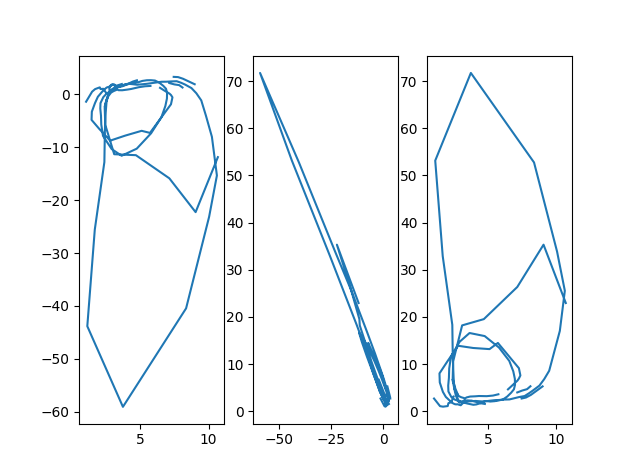

In [63]:
fig_ee = plt.figure()
ax_xy = fig_ee.add_subplot(131)
ax_yz = fig_ee.add_subplot(132)
ax_xz = fig_ee.add_subplot(133)

ax_xy.plot(ee_tip_maped[:, 0], ee_tip_maped[:, 1])
ax_yz.plot(ee_tip_maped[:, 1], ee_tip_maped[:, 2])
ax_xz.plot(ee_tip_maped[:, 0], ee_tip_maped[:, 2])

In [ ]:
fig_ss = plt.figure()
ax_xy = fig_ss.add_subplot(131)
ax_yz = fig_ss.add_subplot(132)
ax_xz = fig_ss.add_subplot(133)

ax_xy.plot(tip_s[:, 0], tip_s[:, 1])
ax_yz.plot(tip_s[:, 1], tip_s[:, 2])
ax_xz.plot(tip_s[:, 0], tip_s[:, 2])

<IPython.core.display.Javascript object>


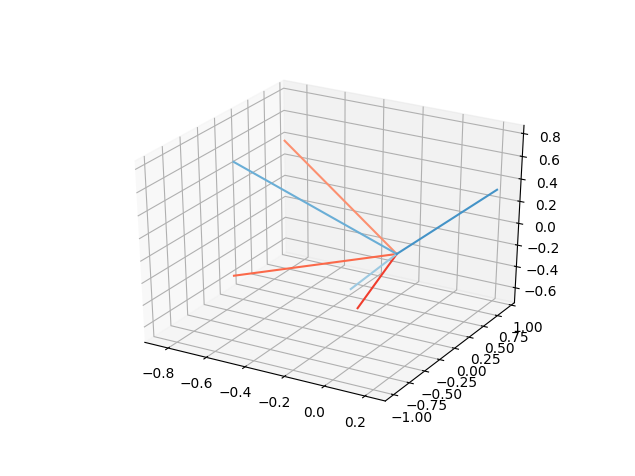

In [65]:
ee_x, ee_y, ee_z = o_map.T

fig_axis = plt.figure()
ax_axis = fig_axis.add_subplot(111, projection='3d')

reds = plt.cm.Reds(np.linspace(0.38, 0.62, 3))
ax_axis.plot([0, x_n[0]], [0, x_n[1]], [0, x_n[2]], c=reds[0])
ax_axis.plot([0, y_n[0]], [0, y_n[1]], [0, y_n[2]], c=reds[1])
ax_axis.plot([0, z_n[0]], [0, z_n[1]], [0, z_n[2]], c=reds[2])

blues = plt.cm.Blues(np.linspace(0.38, 0.62, 3))
ax_axis.plot([0, ee_x[0]], [0, ee_x[1]], [0, ee_x[2]], c=blues[0])
ax_axis.plot([0, ee_y[0]], [0, ee_y[1]], [0, ee_y[2]], c=blues[1])
ax_axis.plot([0, ee_z[0]], [0, ee_z[1]], [0, ee_z[2]], c=blues[2])

In [66]:
orig_maps[pair_1]['map']

array([[ 5.30904333e-01, -8.45565727e-01,  1.17257965e-01],
       [ 1.04553063e-01, -4.62338388e-04, -9.91877529e-01],
       [-8.40957339e-01, -5.33871133e-01, -4.92903385e-02]])

In [67]:
ee_map

array([[-5.29511992e-01, -8.45565727e-01,  1.17257965e-01],
       [-1.04278864e-01, -4.62338388e-04, -9.91877529e-01],
       [ 8.38751857e-01, -5.33871133e-01, -4.92903385e-02]])

In [68]:
# ee_tip_maped = SCALE * (ee_tip @ ee_map) / axis_len
ee_tip_maped = SCALE * (ee_tip @ orig_maps[pair_1]['map']) / axis_len
ss_tip_maped = SCALE * (dfs['level_1'][pair_2]['tip'] @ orig_maps[pair_2]['map']) / axis_len

<IPython.core.display.Javascript object>


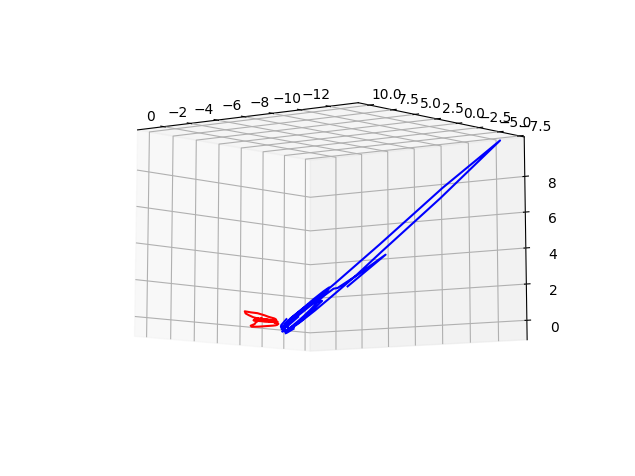

In [69]:
ee_x, ee_y, ee_z = o_map.T

fig_axis = plt.figure()
ax_axis = fig_axis.add_subplot(111, projection='3d')

ax_axis.plot(*(10*tip_s / np.nanmax(tip_s)).T, 'r')
ax_axis.plot(*(10*ee_tip_maped / np.nanmax(ee_tip_maped)).T, 'b')

In [70]:
10*ee_tip_maped / np.nanmax(ee_tip_maped)

array([[            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan

In [71]:
10*tip_s / np.nanmax(tip_s)

array([[            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan